In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data import stock_data
from wfwGARCH import clusteringTest, GARCHWalkForward
from hvPred import HVmodel

In [5]:
con = sqlite3.connect("stock_data.db", check_same_thread=False)

In [16]:
df_stocks=pd.read_csv("results/clustering_scores.csv")

In [17]:
df_stocks.head()

,Ticker,Sector,#Observations,Clustering Score
0,DIA,ETF,6465,1.615
1,SPY,ETF,6458,1.528
2,TLT,ETF,5780,1.507
3,XLF,ETF,6465,1.290
4,ARKK,ETF,2691,1.269


In [20]:
high_clustering_stocks = list(df_stocks['Ticker'].head(3))
high_clustering_stocks

['DIA', 'SPY', 'TLT']

In [21]:
low_clustering_stocks = list(df_stocks['Ticker'].tail(3))
low_clustering_stocks

['CRM', 'GOOGL', 'VXX']

In [22]:
def get_stock_data(stock_list):
    df_dict = {}
    for stock in stock_list:
        st = stock_data(stock)
        df = st.load_data(con)
        df.index = pd.to_datetime(df.index, format='ISO8601')
        df.sort_index(inplace=True)
        df_dict[stock] = df
        df_dict[stock]['returns'] = np.log(df['close'] / df['close'].shift(1))*100 
        df_dict[stock].dropna(inplace=True)
    return df_dict    


In [ ]:
# class GARCH_model_tests:
#     def __init__(self,data):
#         self.data = data

#     # This method returns the wfw predicted volatility, residuals and model fit parameters for a list of stocks
#     def modelResults(self, data):

#     # Plot resiudals to see that there is no pattern
#     def plot_resids(self,resids):

#     # JQ test for resids
#     def jq_test(self. resids):

#     # other tests for resids
    
        

In [ ]:
# class GARCH_HV_comparison:
#     def __init__(self,data):
#         self.data = data
#     # Plot returns, realized volatility and predicted HV and GARCH volatility

#     # compare error metrics



In [6]:
st = stock_data("DIA")
df_DIA = st.load_data(con)
df_DIA.index = pd.to_datetime(df_DIA.index, format='ISO8601')
df_DIA.sort_index(inplace=True)
df_DIA["returns"] = np.log(df_DIA['close'] / df_DIA['close'].shift(1))*100
df_DIA.dropna(inplace = True)

In [7]:
df_DIA

,open,high,low,close,volume,returns
date,,,,,,
1999-11-02,107.00,107.70,105.700,105.70,975300.0,-0.754009
1999-11-03,106.80,106.80,105.800,106.20,1025500.0,0.471922
1999-11-04,107.00,107.40,106.100,106.60,578600.0,0.375940
1999-11-05,108.00,108.30,106.900,107.50,1139100.0,0.840734
1999-11-08,106.40,107.60,106.400,107.40,628600.0,-0.093067
...,...,...,...,...,...,...
2025-07-11,443.67,444.46,442.760,443.57,3345528.0,-0.658378
2025-07-14,443.11,444.76,442.475,444.58,2244693.0,0.227439
2025-07-15,444.58,445.17,440.140,440.15,3810728.0,-1.001444


In [47]:
DIA_GARCH = GARCHWalkForward(df_DIA)
DIA_GARCH.fit_garch()
DIA_GARCH.compute_error_metrics()

In [48]:
print(DIA_GARCH.error_metrics)

{'MAE': 0.3653302412689862, 'MSE': 0.21451192394189675, 'RMSE': np.float64(0.46315431979189914), 'QLIKE': np.float64(0.44720485231302143)}


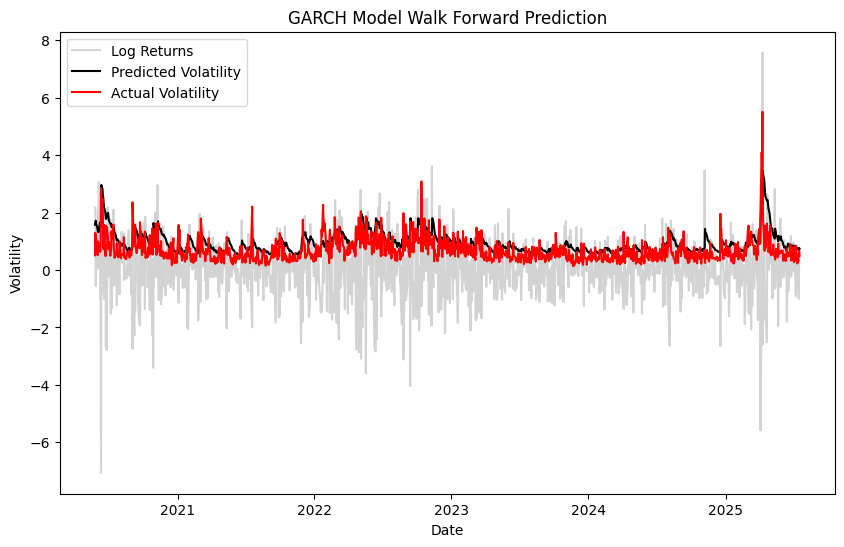

In [49]:
DIA_GARCH.plot_results()

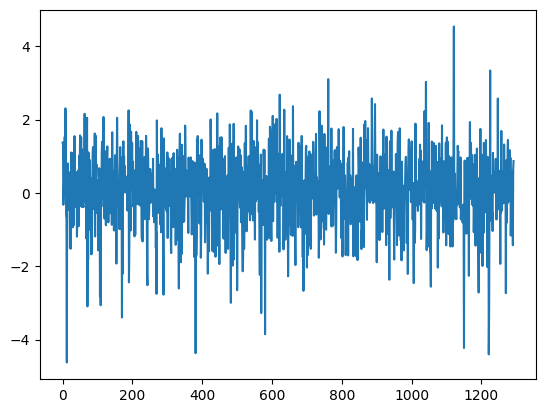

In [16]:
plt.plot(DIA_GARCH.residuals)

In [37]:
DIA_GARCH.fit_params

In [22]:
params_DIA_GARCH

[{'mu': 0.0638865664499323,
  'omega': 0.022051289746171585,
  'alpha[1]': 0.13283585191273065,
  'beta[1]': 0.851430460015245},
 {'mu': 0.06396922539797127,
  'omega': 0.022019566503848426,
  'alpha[1]': 0.13280265503015723,
  'beta[1]': 0.8515243281147776},
 {'mu': 0.06404595111411016,
  'omega': 0.02200069491593719,
  'alpha[1]': 0.132813432764103,
  'beta[1]': 0.8515610814118851},
 {'mu': 0.06403762750241113,
  'omega': 0.022020944303843958,
  'alpha[1]': 0.13278366152667087,
  'beta[1]': 0.8515309396259712},
 {'mu': 0.06405478403228267,
  'omega': 0.022052338015881436,
  'alpha[1]': 0.13278981335840404,
  'beta[1]': 0.8514527056513634},
 {'mu': 0.06409511284345273,
  'omega': 0.02209144905922721,
  'alpha[1]': 0.1328434320583635,
  'beta[1]': 0.8513269304289806},
 {'mu': 0.0641694704356503,
  'omega': 0.022118289651374287,
  'alpha[1]': 0.1328992599678647,
  'beta[1]': 0.8512287893405999},
 {'mu': 0.06424266668375544,
  'omega': 0.022058204362120234,
  'alpha[1]': 0.13277934817546

In [38]:
len(DIA_GARCH.predictions)

TypeError: object of type 'NoneType' has no len()